# Outline

We want to show $|A_1 \cap A_3|=1$ fails to give assignments giving $|\cup^{4}A_i|=4$. By permtation so does $|A_2 \cap A_4|=1$. As a consequence this will show $|\bigcap^{3}A_i|=0$ and give an understanding of the global condition, and a method to determine assignments for $I_4$.

Recall the following notation.

In [3]:
from sympy import *
from IPython.display import Image
init_printing()

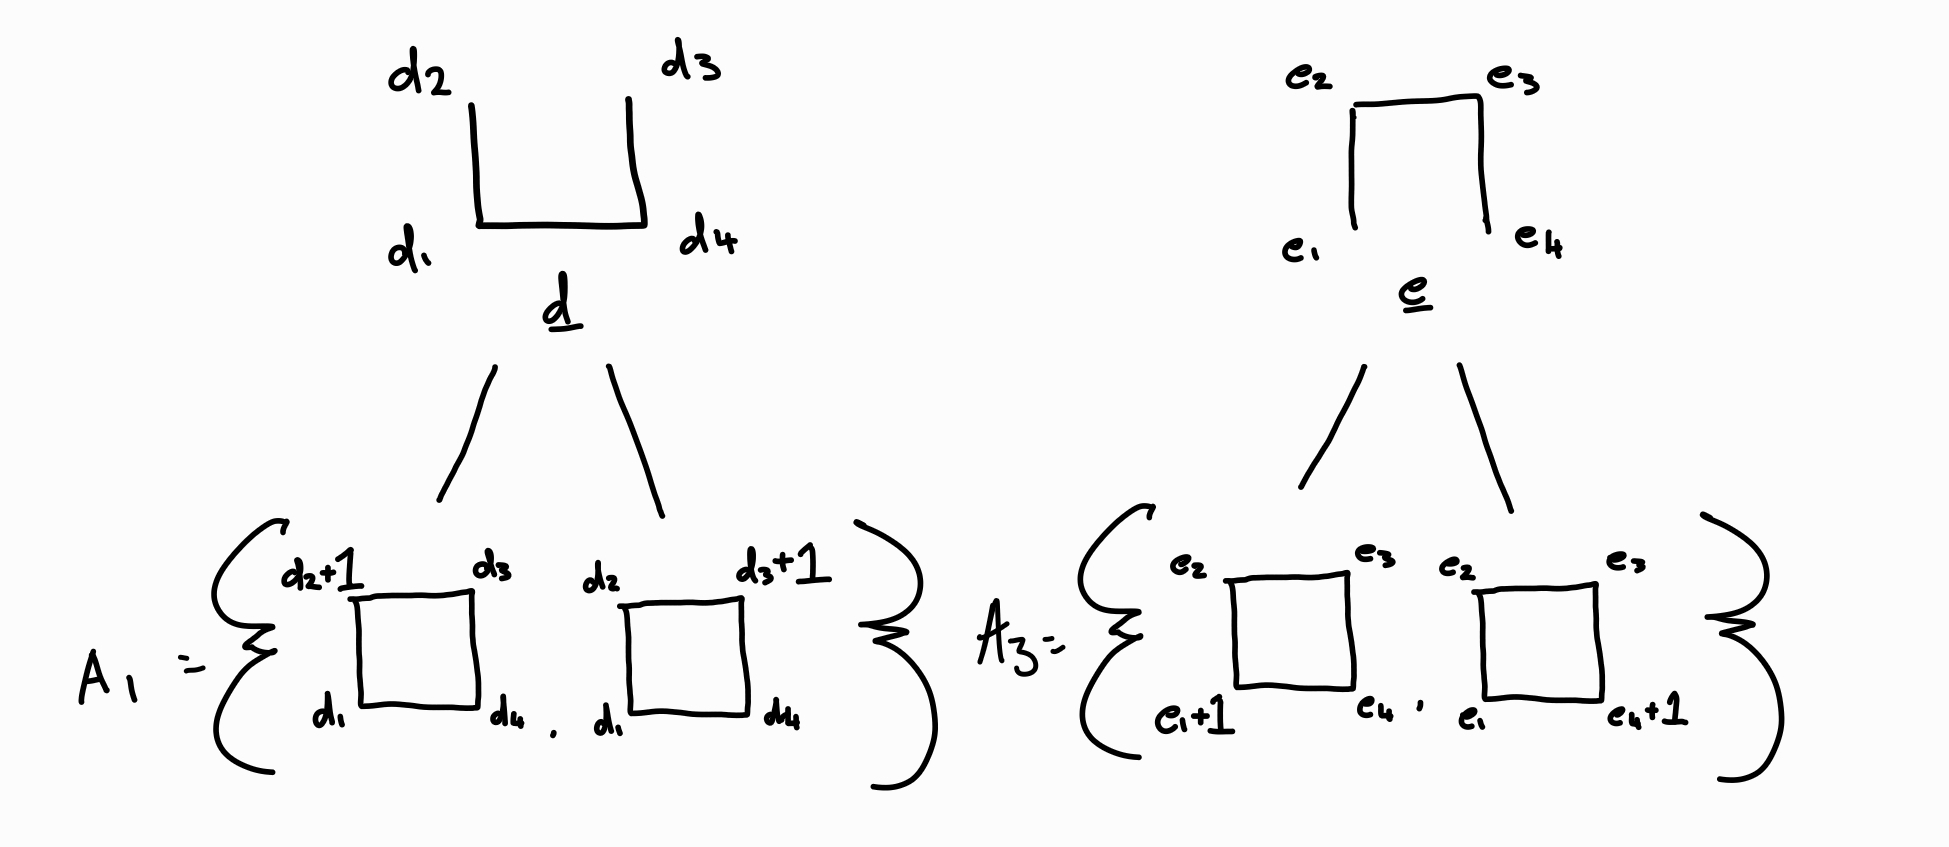

In [4]:
fig = Image(filename=('I4_weak_stab/disjoint/t1_t3_pres.png'), width=700, height=300)
fig

As $|A_1 \cap A_3|=1$, we therefore have $4$ starting choices for $\underline{e}$. For each case we can write $\underline{e}$ in terms of $\underline{d}$.

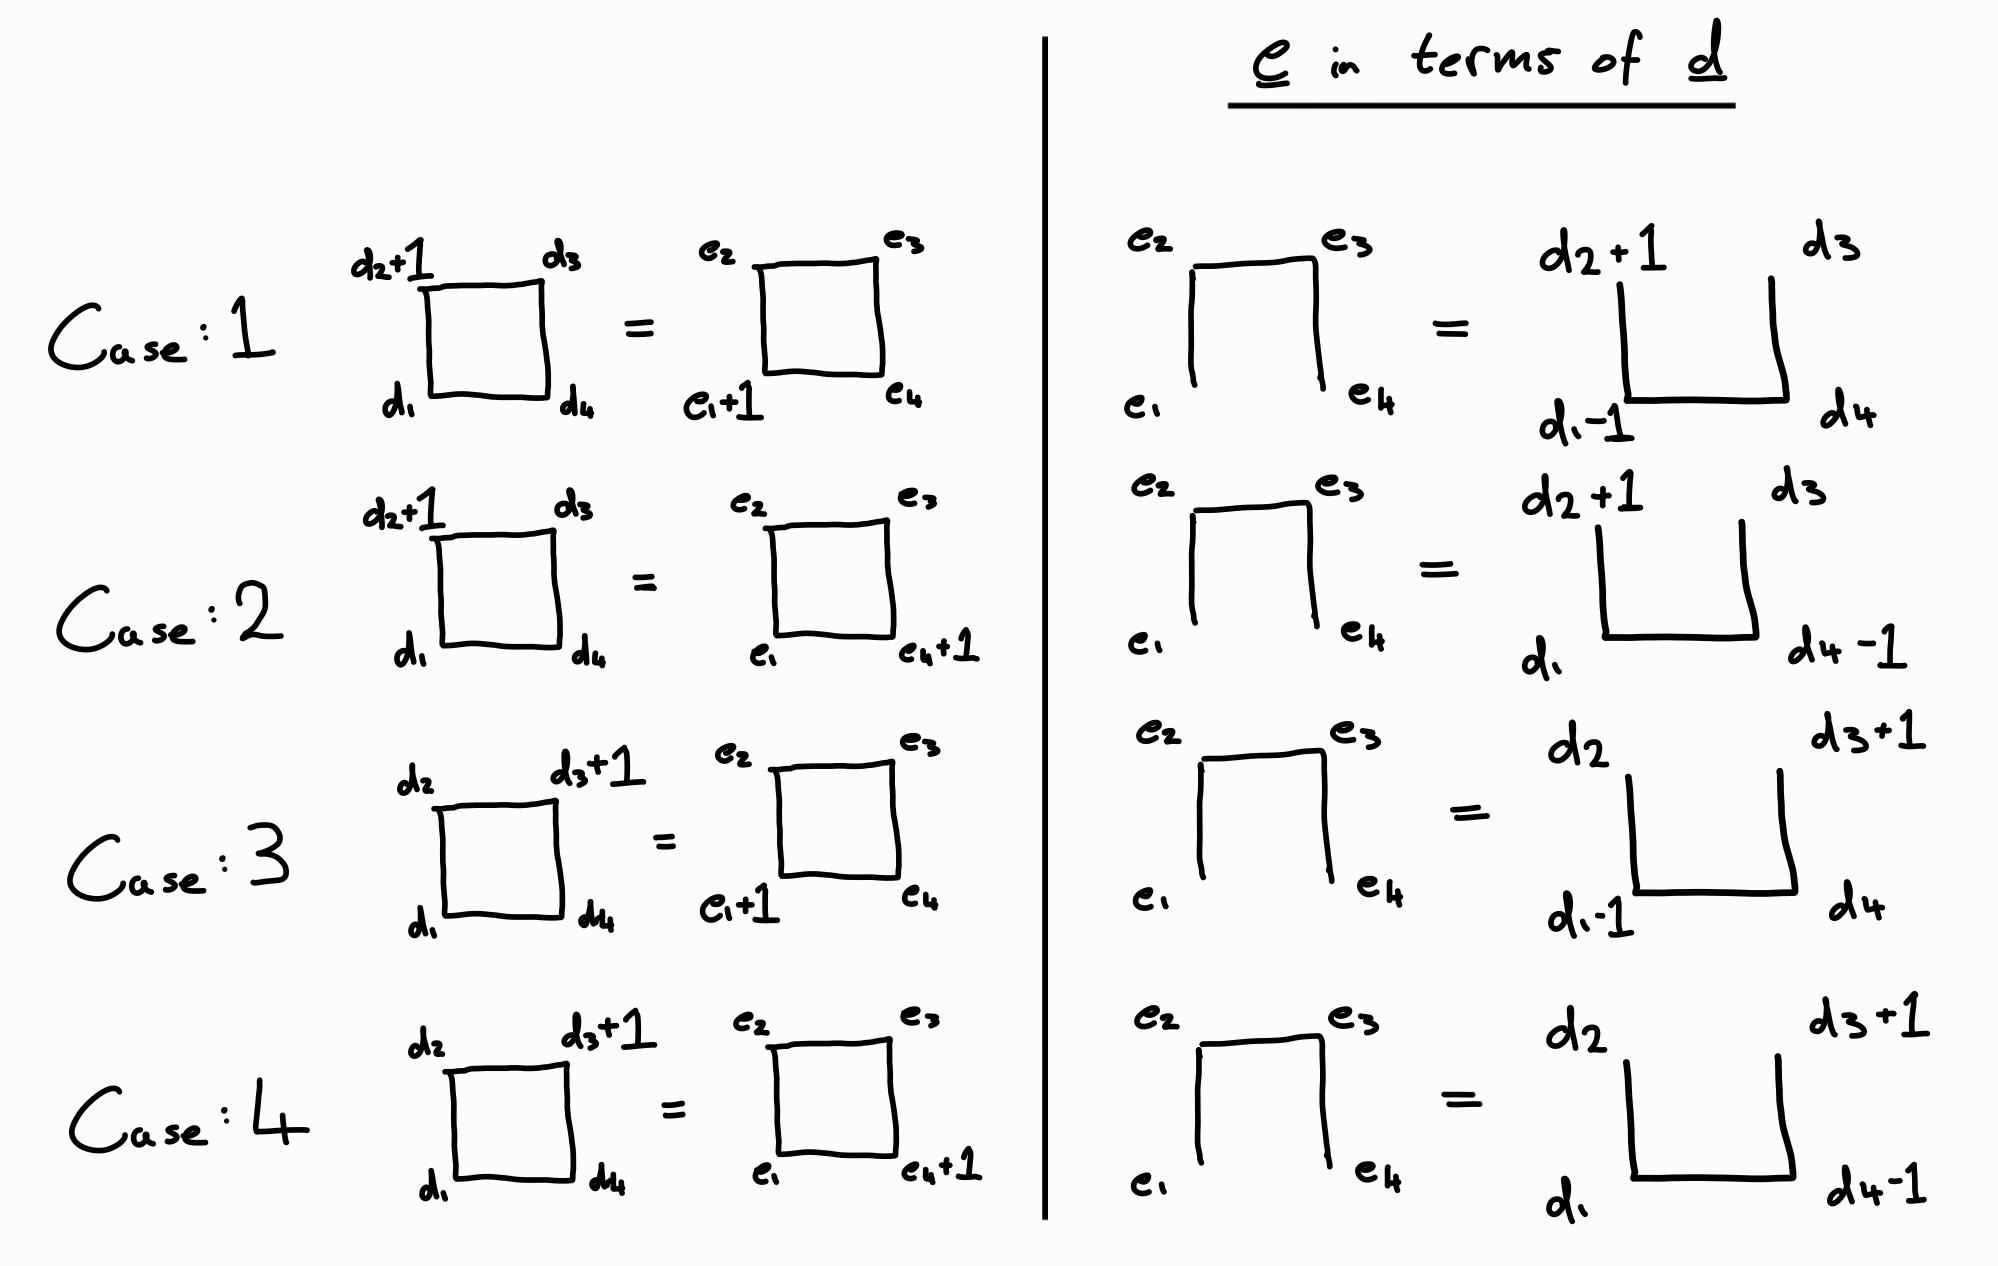

In [5]:
fig = Image(filename=('I4_weak_stab/disjoint/cases.jpg'), width=700, height=300)
fig

## Notation

We make use of sympy to avoid using $\underline{0}$ on $T_1$ to make the problem finite. We have $A_i:=\sigma(T_i,d_i)$ and the following labeling of $I_4$,

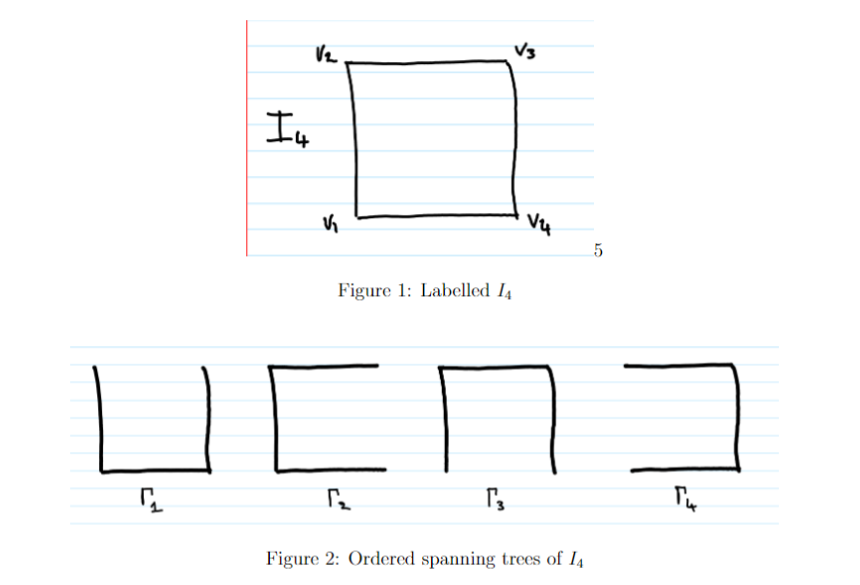

In [6]:
fig = Image(filename=('I4_weak_stab/I4_notation.png'), width=700, height=300)
fig

Remark: We can not have $|A_i|=1$ and can not have $|A_i \cap A_j|$=2.

# Case 1: $T_2$ then $T_4$

Let us look at Case $1$ in detail first, we will run the remaining cases at the end in a compact form. We first load the data to construct the $A_i$ terms.

In [4]:
#Symbols
d11, d12, d13, d14 = symbols("d11, d12, d13,d14", integer=True)
a,b,c,d=symbols("a,b,c,d")

In [5]:
#Assignments:
d1 = Matrix([d11,d12,d13,d14])
d3 = Matrix([d11-1,d12+1,d13,d14]) #Cases 1 choice for d3 (see diagram)

In [6]:
# sigma data: vij denote where we add 1 on chip adding on T_i.

v11,v12= Matrix([0,1,0,0]),Matrix([0,0,1,0])
v21,v22= Matrix([0,0,1,0]),Matrix([0,0,0,1])
v31,v32= Matrix([0,0,0,1]),Matrix([1,0,0,0])
v41,v42= Matrix([1,0,0,0]),Matrix([0,1,0,0])

sig_d1=FiniteSet(d1+v11,d1+v12)
sig_d3=FiniteSet(d3+v31,d3+v32)

We now determine assignemnts for $T_2$ and $T_4$, we can do these in any order. Lets do $T_2$ first then $T_4$ (the choice for $d_4$ on $T_4$ will depend on $d_2$ on $T_2$), we will then do $T_4$ first then $T_2$, after. We look for ranges for vertex values for $d_2$, this is exhaustive, obtaining all $d_2$ where we may have $|(A_1 \cup A_3) \cap A_2|\ge 1$.

We take are arbitary $d_2$ and form $A_2=\{a_21,a_22\}$ we require that $|(A_1 \cup A_3) \cap A_2|\ge 1$. This would require we run through the cases equating vectors $a_21$ and/or $a_22$ to elements of $A_1 \cup A_3$ then rearranging for $d_2$ while remembering the chip adding that gave $a_21$ or $a_22$ and the associated element of $A_1 \cup A_3$. Instead of equating vectors we exhaust all cases where $|(A_1 \cup A_3) \cap A_2|\ge 1$ to find $d_2$, we take the components of vectors of $A_1 \cup A_3$ and taking all combinations to form elements of $A_2$, we also include the shift of vertex values by the chip adding on $T_2$. Finally we take all combinations of these values to obtain an exhaustie list of $d_2$ where $|(A_1 \cup A_3) \cap A_2|\ge 1$.

In [7]:
union_d1_d3=sig_d1.union(sig_d3)
a_lst,b_lst,c_lst,d_lst=[],[],[],[]

for i in union_d1_d3:
    a_lst.append(i[0])
    b_lst.append(i[1])
    c_lst.append(i[2])
    d_lst.append(i[3])
    
a_set,b_set,c_set,d_set=set(a_lst),set(b_lst),set(c_lst),set(d_lst)

## As d2 on T2, we also include the values of the shift by [0,0,-1,-1] by chip adding on T_2.

c_set_m={x-1 for x in c_set}
d_set_m={x-1 for x in d_set}
c_set=c_set.union(c_set_m)
d_set=d_set.union(d_set_m)
print(a_set,b_set,c_set,d_set)

{d11, d11 - 1} {d12 + 1, d12} {d13 - 1, d13 + 1, d13} {d14 + 1, d14, d14 - 1}


We now permute through all vertex values to obtain a list of possible $d_2$.

In [8]:
d2_lst=[] #Possibilities to check.
for a in a_set:
    for b in b_set:
        for c in c_set:
            for d in d_set:
                d2=[a,b,c,d]
                d2_lst.append(d2)
print(len(d2_lst))

36


Now fix a $d_2$ on $T_2$, and apply the same procedure to $T_4$ to obtain $d_4$. We record the total assignment $(d1,d2,d3,d4)$ in a list to be checked for size of $|\cup^{4}A_i|$.

In [9]:
total_assign=[]

for d2 in d2_lst:
    d2 = Matrix(d2) #On T2.
    d2_pres=FiniteSet(d2+v21,d2+v22)
    union_d1d3d2=union_d1_d3.union(d2_pres) #Union of A1,A3 and A2

    # Get possible vertex values for d4
    a_lst,b_lst,c_lst,d_lst=[],[],[],[]

    for i in union_d1d3d2:
        a_lst.append(i[0])
        b_lst.append(i[1])
        c_lst.append(i[2])
        d_lst.append(i[3])

    a_set,b_set,c_set,d_set=set(a_lst),set(b_lst),set(c_lst),set(d_lst)

    ## As d4 on T4 we also include the values of the shift [-1,-1,0,0] by chip adding on T4.

    a_set_m={x-1 for x in a_set}
    b_set_m={x-1 for x in b_set}

    a_set=a_set.union(a_set_m)
    b_set=b_set.union(b_set_m)

    # Now permute through possible values on vertices to get d4 terms.
    d4_lst=[]
    for a in a_set:
        for b in b_set:
            for c in c_set:
                for d in d_set:
                    d4=Matrix([a,b,c,d])
                    d4_lst.append(d4)
                    
    #Finally we add the assignment to total list to be checked for size.
    for d4 in d4_lst:
        total_assign.append([d1,d2,d3,d4])
        
print(len(total_assign))

2304


We now have a collection of assignments and we check the size of $|\cup^{4} A_i|$ for these.

In [10]:
weak_stab=[]
for ass in total_assign:
    d1,d2,d3,d4=ass[0],ass[1],ass[2],ass[3]
    
    sig_d1=FiniteSet(d1+v11,d1+v12)
    sig_d2=FiniteSet(d2+v21,d2+v22) 
    sig_d3=FiniteSet(d3+v31,d3+v32)
    sig_d4=FiniteSet(d4+v41,d4+v42)
    
    total_union=sig_d1.union(sig_d2).union(sig_d3).union(sig_d4)
    if len(total_union)==4:
        weak_stab.append(ass)
print(f"The total number of weak stabilities for Case 1 ($T_2$ then $T_4$) is: {len(weak_stab)}")

The total number of weak stabilities for Case 1 ($T_2$ then $T_4$) is: 2


## Analysis

Punchline: By the analysis below these are the two assignments that work, one for each specific $d_2$ that nicola suggested. Substituting $\underline{0}$ for $d_1$ on $T_1$ we have weak_stab[0] corresponding to Assignment 2 in overleaf and weak_stab[1] to Assignement 1.

This disproves my assumption that $|A_1 \cap A_3|=1$ is not possible. Therefore We may have $|B_i|=0,1$

So far we know $|\cup^{4}A_i|=0$, $|B_i|=0,1$ and $|A_i|=0,1$

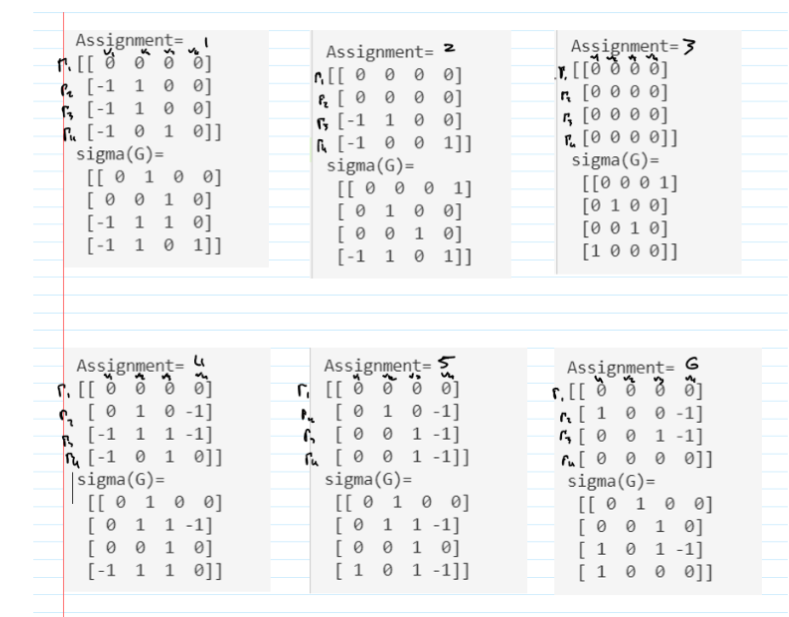

In [13]:
fig = Image(filename=('I4_weak_stab/I4_phi_stabs.png'), width=700, height=300)
fig

In [11]:
#Checking the sizes of combinations of unions of A_i

def check_sizes(ass):
    
    print("Assignment:")
    for j in ass:
        print(j,"\n")

    d1,d2,d3,d4=ass[0],ass[1],ass[2],ass[3]

    sig_d1=FiniteSet(d1+v11,d1+v12)
    sig_d2=FiniteSet(d2+v21,d2+v22) 
    sig_d3=FiniteSet(d3+v31,d3+v32)
    sig_d4=FiniteSet(d4+v41,d4+v42)

    union1234=sig_d1.union(sig_d2).union(sig_d3).union(sig_d4)
    
#     print("The union of 4 A_i is: ",union1234,"\n")

    union123=sig_d1.union(sig_d2).union(sig_d3)
    union124=sig_d1.union(sig_d2).union(sig_d4)
    union134=sig_d1.union(sig_d3).union(sig_d4)
    union234=sig_d2.union(sig_d3).union(sig_d4)

    union12=sig_d1.union(sig_d2)
    union13=sig_d1.union(sig_d3)
    union14=sig_d1.union(sig_d4)

    union23=sig_d2.union(sig_d3)
    union24=sig_d2.union(sig_d4)
    union34=sig_d3.union(sig_d4)

    print(f"Union of 4 A_i terms: {len(union1234)}")

    print(f"Combinations of union of 3 A_i terms: {len(union123),len(union124),len(union134),len(union234)}")

    print(f"Combinations of union of 2 A_i terms:{len(union12),len(union13),len(union14),len(union23),len(union24),len(union34)}")
    
    return

# check_sizes(weak_stab[0]) #len(union12),len(union34) have size 4
check_sizes(weak_stab[1]) # len(union14),len(union23) have size 4

Assignment:
Matrix([[d11], [d12], [d13], [d14]]) 

Matrix([[d11 - 1], [d12 + 1], [d13], [d14]]) 

Matrix([[d11 - 1], [d12 + 1], [d13], [d14]]) 

Matrix([[d11 - 1], [d12], [d13 + 1], [d14]]) 

Union of 4 A_i terms: 4
Combinations of union of 3 A_i terms: (4, 4, 4, 4)
Combinations of union of 2 A_i terms:(4, 3, 3, 3, 3, 4)


## Case 1: $T_4$ then $T_2$

We now run the same procedure but choosing $d_4$ on $T_4$ and then $d_2$ on $T_2$. We look for ranges for vertex values for $d_4$, this is exhaustive, obtaining all $d_4$ where we may have $|(A_1 \cup A_3) \cap A_4|=1$. We then form $d_4$ terms.

In [69]:
#Assignments:
d1 = Matrix([d11,d12,d13,d14])
d3 = Matrix([d11-1,d12+1,d13,d14]) #Cases 1 choice for d3 (see diagram)
# sigma data: vij denote where we add 1 on chip adding on T_i.
v11,v12= Matrix([0,1,0,0]),Matrix([0,0,1,0])
v21,v22= Matrix([0,0,1,0]),Matrix([0,0,0,1])
v31,v32= Matrix([0,0,0,1]),Matrix([1,0,0,0])
v41,v42= Matrix([1,0,0,0]),Matrix([0,1,0,0])

sig_d1=FiniteSet(d1+v11,d1+v12)
sig_d3=FiniteSet(d3+v31,d3+v32)

In [71]:
union_d1_d3=sig_d1.union(sig_d3)
a_lst,b_lst,c_lst,d_lst=[],[],[],[]

for i in union_d1_d3:
    a_lst.append(i[0])
    b_lst.append(i[1])
    c_lst.append(i[2])
    d_lst.append(i[3])
    
a_set,b_set,c_set,d_set=set(a_lst),set(b_lst),set(c_lst),set(d_lst)

## As d4 on T4, we also include the values of the shift by [-1,-1,0,0] by chip adding on T_4.

a_set_m={x-1 for x in a_set}
b_set_m={x-1 for x in b_set}
a_set=c_set.union(a_set_m)
b_set=d_set.union(b_set_m)
# print(a_set,b_set,c_set,d_set)

d4_lst=[] #Possibilities to check.
for a in a_set:
    for b in b_set:
        for c in c_set:
            for d in d_set:
                d4=[a,b,c,d]
                d4_lst.append(d4)
print(len(d4_lst))

64


Now fix a $d_4$ on $T_4$, we apply the same procedure to $T_2$ to obtain $d_2$. We record the total assignment $(d1,d2,d3,d4)$ in a list to be checked for size.

In [72]:
total_assign=[]

for d4 in d4_lst:
    d4 = Matrix(d4) #On T4.
    d4_pres=FiniteSet(d4+v41,d4+v42)
    union_d1d3d4=union_d1_d3.union(d4_pres)

    # Get possible vertex values for d2
    a_lst,b_lst,c_lst,d_lst=[],[],[],[]

    for i in union_d1d3d4:
        a_lst.append(i[0])
        b_lst.append(i[1])
        c_lst.append(i[2])
        d_lst.append(i[3])

    a_set,b_set,c_set,d_set=set(a_lst),set(b_lst),set(c_lst),set(d_lst)

    ## As d2 on T2 we also include the values of the shift [0,0,-1,-1] by chip adding on T2.

    c_set_m={x-1 for x in c_set}
    d_set_m={x-1 for x in d_set}

    c_set=c_set.union(c_set_m)
    d_set=d_set.union(d_set_m)

    # Now permute through possible values on vertices to get d4 terms.
    d2_lst=[]
    for a in a_set:
        for b in b_set:
            for c in c_set:
                for d in d_set:
                    d2=Matrix([a,b,c,d])
                    d2_lst.append(d2)
                    
    #Finally we add the assignment to total list to be checked for size.
    for d2 in d2_lst:
        total_assign.append([d1,d2,d3,d4])
        
print(len(total_assign))

6084


We now have a collection of assignments and we check the size of $|\cup^{4} A_i|$ for these.

In [82]:
def total_weak_stab(total_assign):
    weak_stab=[]
    for ass in total_assign:
        d1,d2,d3,d4=ass[0],ass[1],ass[2],ass[3]

        sig_d1=FiniteSet(d1+v11,d1+v12)
        sig_d2=FiniteSet(d2+v21,d2+v22) 
        sig_d3=FiniteSet(d3+v31,d3+v32)
        sig_d4=FiniteSet(d4+v41,d4+v42)

        total_union=sig_d1.union(sig_d2).union(sig_d3).union(sig_d4)
        
        if len(total_union)==4:
            weak_stab.append(ass)
    return weak_stab
        
weak_stabT4T2=total_weak_stab(total_assign)
print(f"The total number of weak stabilities for Case 1 ($T_4$ then $T_2$) is: {len(weak_stab)}")

The total number of weak stabilities for Case 1 ($T_4$ then $T_2$) is: 2


## Analysis

In [89]:
# check_sizes(weak_stabT4T2[0]) 
check_sizes(weak_stabT4T2[1]) 

Assignment:
Matrix([[d11], [d12], [d13], [d14]]) 

Matrix([[d11 - 1], [d12 + 1], [d13], [d14]]) 

Matrix([[d11 - 1], [d12 + 1], [d13], [d14]]) 

Matrix([[d11 - 1], [d12], [d13 + 1], [d14]]) 

Union of 4 A_i terms: 4
Combinations of union of 3 A_i terms: (4, 4, 4, 4)
Combinations of union of 2 A_i terms:(4, 3, 3, 3, 3, 4)


Comparing doing $T_2$ then $T_4$, with $T_4$ then $T_2$.

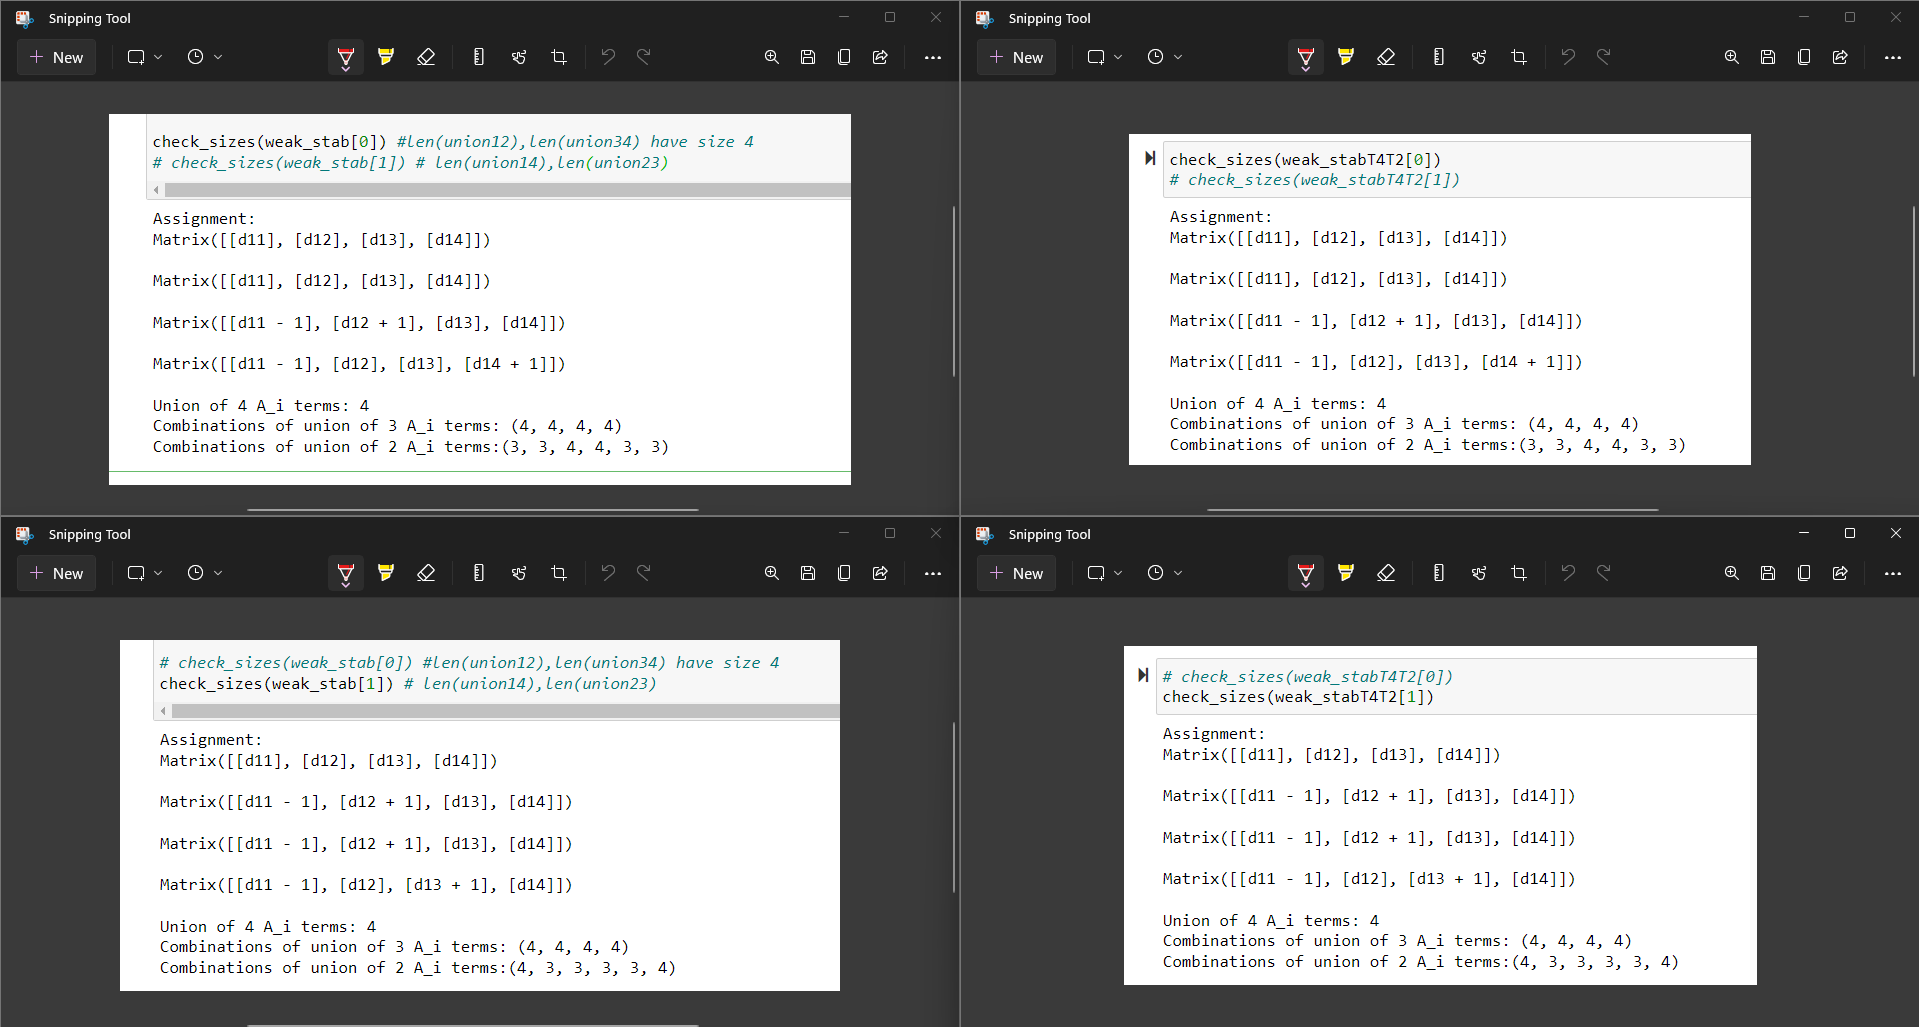

In [94]:
fig = Image(filename=('I4_weak_stab/disjoint/Case1T2T4CompareT4T2.png'), width=900, height=700)
fig

# Leftovers

To finish this I would still need to run the for the other cases. We expect they will also produce phi stabilities. We want a cleaner method that this if we are to do this properly.

# Remaining Cases: Choice of $d_3$ on $T_3$

As we had $4$ choices for $\underline{e}$ on $T_3$, we run the whole thing again and record distinct cases for choice of d2 on $T_2$.


In [12]:
## Other choices for d3

d3_c2 = Matrix([d11,d12+1,d13,d14-1]) #2) #Choice 2
d3_c3 = Matrix([d11-1,d12,d13+1,d14]) #3) #Choice 3
d3_c4 = Matrix([d11,d12,d13+1,d14-1]) #4) #Choice 4


In [ ]:
def load(item_num):
    """item number= is the i'th term of data containing [d3,d2] that give union of 4 with d1."""
    
    d1 = Matrix([d11,d12,d13,d14])

    #First pick a d3,d2 #After finish will run loop

    d3=data[item_num][0]
    d2=data[item_num][1]

    #sigma data

    sig_d1=FiniteSet(d1+v11,d1+v12)
    sig_d3=FiniteSet(d3+v31,d3+v32)
    sig_d2=FiniteSet(d2+v21,d2+v22) 
    union_d1_d3=sig_d1.union(sig_d3)
    union_d1d3d2=sig_d2.union(union_d1_d3)

    return (d1,d2,d3,union_d1d3d2)

In [ ]:
### Function Format for Main

def get_assranges(union_d1d3d2):
    a_lst,b_lst,c_lst,d_lst=[],[],[],[]

    for i in union_d1d3d2:
        a_lst.append(i[0])
        b_lst.append(i[1])
        c_lst.append(i[2])
        d_lst.append(i[3])

    a_set,b_set,c_set,d_set=set(a_lst),set(b_lst),set(c_lst),set(d_lst)

    ## As d4 on T2 (consistent with nics example) we also include the values of the shift [0,-1,-1,0].

    # We are assuming T1,T3,T4 is similar to T1,T3,T2

    b_set_m={x-1 for x in b_set}
    c_set_m={x-1 for x in c_set}

    b_set=b_set.union(b_set_m)
    c_set=c_set.union(c_set_m)

    #Check size of total union
    return a_set,b_set,c_set,d_set


# get_assranges(load(0)[3])
# # ({d11, d11 + 1}, {d12, d12 + 1, d12 - 1}, {d13 - 2, d13, d13 - 1}, {d14 + 2, d14, d14 + 1})
# works so far

In [ ]:
def get_d4_lst(a_set,b_set,c_set,d_set):
    d4_lst=[] #Possibilities to check.
    for a in a_set:
        for b in b_set:
            for c in c_set:
                for d in d_set:
                    d4=[a,b,c,d]
                    d4_lst.append(d4)
    return d4_lst

In [ ]:
### Function Format for Main
    
def run_d4_lst(d4_lst,union_d1d3d2):
    keep_d4=[] #Rem d2 that give size 4.
    for d4 in d4_lst:
        d4 = Matrix(d4) #On T2.
        d4_pres=FiniteSet(d4+v41,d4+v42)
        total_sig=union_d1d3d2.union(d2_pres)
        if len(total_sig)==4:
            keep_d4.append(d2)

    print("The number of assignments (d1,d2,d3,__d4__) with size 4 are:",len(keep_d4))
    
    #Will return to if non-zero example appears, to get assignments (d1,d2,d3,d4)

#     for i in keep_d4:
#         print(i,"\n")
#     print(keep_d4)
    return keep_d4

In [13]:
# Package as series of functions to run through data list.

#Main

assignments=[]
for i in range(len(data)):
#     print(i)
    ass_data=load(i)
#     print(ass_data)
    union_d1d3d2=ass_data[3]
#     print(union_d1d3d2)
    abcd_set=get_assranges(union_d1d3d2)
#     print(abcd_set)
    d4_lst=get_d4_lst(*abcd_set) #*unpacks variables https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/
#     print(len(d4_lst))
    
    keep_d4=run_d4_lst(d4_lst,union_d1d3d2)
#     print(len(keep_d4))
    
    if len(keep_d4)>0:
        for d4 in keep_d4:
            ass=(ass_data[0],ass_data[2],ass_data[1],d4) #in order d1,d2,d3,d4
            assignments.append(ass)

    
    
    


The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4 are: 0
The number of assignments (d1,d2,d3,__d4__) with size 4